In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 4.2 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/3.0 MB 3.8 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 5.2 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 4.3 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 4.2 MB/s eta 0:00:01
     ------------------- -------------------- 1.5/3.0 MB 5.5 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 5.4 MB/s eta 0:00:01
     ------------------------- -------------- 1.9/3.0 MB 5.0 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 5.0 MB/s eta 0:00:01
     -------------------------------- ------- 2.4/3.0 MB 5.1 MB/s eta 0:00:01
     ----------------------------------- ---- 2.6/3.0 MB 5.0 MB/s eta 0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires PyYAML==6.0, but you have pyyaml 3.13 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.2 which is incompatible.
huggingface-hub 0.10.1 requires pyyaml>=5.1, but you have pyyaml 3.13 which is incompatible.
transformers 4.24.0 requires pyyaml>=5.1, but you have pyyaml 3.13 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] 

In [14]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [15]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

In [16]:
# list of stock tickers to download
tickers=['AAPL','MSFT','NFLX','GOOG','TSLA']

In [17]:
data=yf.download(tickers,start=start_date, end=end_date, progress=False)

In [18]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()


In [19]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])


In [20]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

In [21]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()


In [22]:
print(stock_data.head())

Attribute       Date Ticker   Adj Close       Close        High         Low  \
0         2023-05-30   AAPL  176.363373  177.300003  178.990005  176.570007   
1         2023-05-30   GOOG  124.639999  124.639999  126.379997  122.889999   
2         2023-05-30   MSFT  328.639160  331.209991  335.739990  330.519989   
3         2023-05-30   NFLX  392.980011  392.980011  405.109985  385.790009   
4         2023-05-30   TSLA  201.160004  201.160004  204.479996  197.529999   

Attribute        Open       Volume  
0          176.960007   55964400.0  
1          126.290001   27230700.0  
2          335.230011   29503100.0  
3          397.480011   10865000.0  
4          200.100006  128818700.0  


Date: The date of the stock data entry.
Ticker: The stock ticker symbol.
Adj Close: The adjusted closing price of the stock, which accounts for any corporate actions like splits or dividends.
Close: The closing price of the stock.
High: The highest price of the stock during the trading day.
Low: The lowest price of the stock during the trading day.
Open: The opening price of the stock.
Volume: The number of shares traded during the day.

In [23]:
# convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# set the 'Date' column as the index of the dataframe
stock_data.set_index('Date', inplace=True)
print(stock_data.head())

Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-05-30   AAPL  176.363373  177.300003  178.990005  176.570007  176.960007   
2023-05-30   GOOG  124.639999  124.639999  126.379997  122.889999  126.290001   
2023-05-30   MSFT  328.639160  331.209991  335.739990  330.519989  335.230011   
2023-05-30   NFLX  392.980011  392.980011  405.109985  385.790009  397.480011   
2023-05-30   TSLA  201.160004  201.160004  204.479996  197.529999  200.100006   

Attribute        Volume  
Date                     
2023-05-30   55964400.0  
2023-05-30   27230700.0  
2023-05-30   29503100.0  
2023-05-30   10865000.0  
2023-05-30  128818700.0  


# Stock Market Anomaly Detection Using Python

Now lets get started with the task of stock market anomaly detection with a visualization of the adjusted close prices and volumes for each ticker over time to get an overview of the data:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

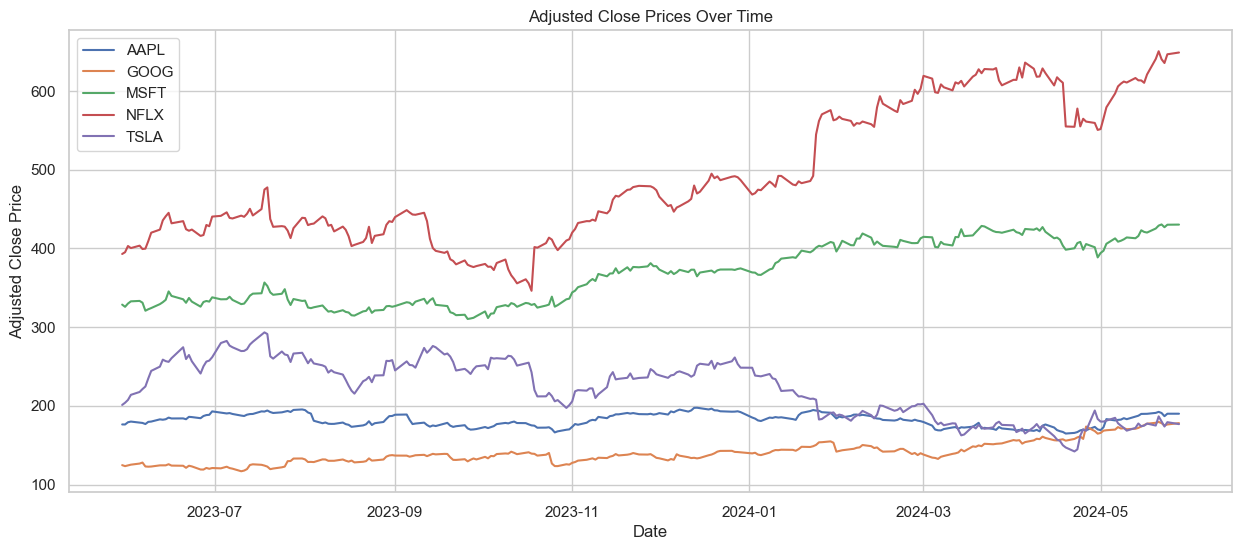

In [25]:
# plotting the adjusted close prices for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Adj Close'], label=ticker)
    plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

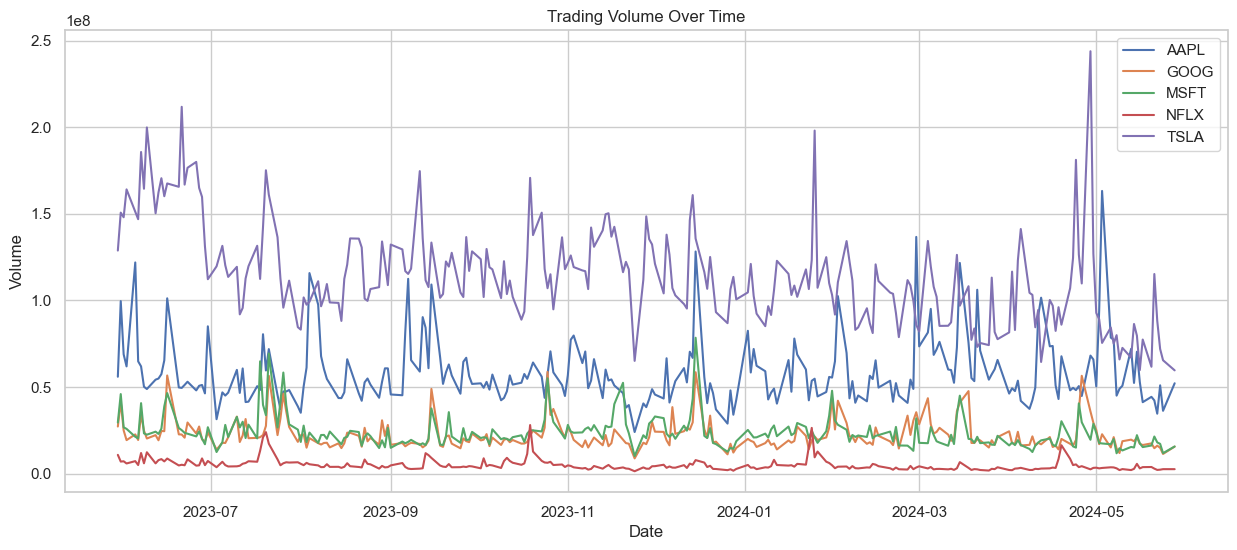

In [26]:
# plotting the trading volume for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Volume'], label=ticker)
    plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

The first graph shows the adjusted closing prices of five different stocks:

AAPL (Apple Inc.)
GOOG (Alphabet Inc.)
MSFT (Microsoft Corporation)
NFLX (Netflix, Inc.)
and TSLA (Tesla, Inc.)
GOOG appears to have the highest price and shows a general uptrend throughout the period, despite some volatility. TSLA and AAPL also exhibit an uptrend, with AAPL’s stock price increasing more steadily. MSFT and NFLX display relatively lower prices compared to the others, with NFLX showing considerable fluctuation but remaining mostly flat, and MSFT demonstrating a slight downtrend towards the end of the period.

From the second graph, it is evident that AAPL and TSLA have the highest and most volatile trading volumes, with TSLA showing particularly large spikes. It suggests significant investor interest or reactions to events during those times. GOOG, while having the highest stock price, shows moderate and relatively stable trading volume. MSFT and NFLX have lower and less volatile trading volumes in comparison to AAPL and TSLA. The spikes and dips in trading volumes could correspond to earnings reports, product announcements, or other market-moving events for these companies.


Detecting Anomalies in the Stock Market
Given the variability and trends observed in both adjusted close prices and trading volumes, anomaly detection can focus on identifying:

Significant price movements that deviate from the stock’s typical price range or trend.
Unusual trading volumes that stand out from the normal trading activity.
For the task of stock market anomaly detection, we can use the Z-score method, which identifies anomalies based on how many standard deviations away a data point is from the mean. A common threshold for identifying an anomaly is a Z-score greater than 2 or less than -2, which corresponds to data points that are more than 2 standard deviations away from the mean.

We will compute the Z-scores for both the adjusted close prices and trading volumes for each stock and then identify any data points that exceed this threshold:

In [27]:
from scipy.stats import zscore

def detect_anomalies(df, column):
    df_copy = df.copy()

    # calculate Z-scores and add them as a new column
    df_copy['Z-score'] = zscore(df_copy[column])

    # find where the absolute Z-score is greater than 2 (common threshold for anomalies)
    anomalies = df_copy[abs(df_copy['Z-score']) > 2]
    return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data['Ticker'].unique():
    data_ticker = stock_data[stock_data['Ticker'] == ticker]

    adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
    volume_anomalies = detect_anomalies(data_ticker, 'Volume')

    # use concat instead of append
    anomalies_adj_close = pd.concat([anomalies_adj_close, adj_close_anomalies])
    anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])

print(anomalies_adj_close.head())

Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2024-04-19   AAPL  164.776505  165.000000  166.399994  164.080002  166.210007   
2024-04-26   GOOG  173.690002  173.690002  176.419998  171.399994  175.990005   
2024-05-02   GOOG  168.460007  168.460007  168.529999  165.690002  166.669998   
2024-05-03   GOOG  168.990005  168.990005  169.850006  164.979996  169.539993   
2024-05-06   GOOG  169.830002  169.830002  169.899994  167.889999  169.220001   

Attribute       Volume   Z-score  
Date                              
2024-04-19  67772100.0 -2.030967  
2024-04-26  56500800.0  2.378272  
2024-05-02  17041100.0  2.007928  
2024-05-03  22767100.0  2.045458  
2024-05-06  15147900.0  2.104940  


In [28]:
print(anomalies_volume.head())

Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-05-31   AAPL  176.313644  177.250000  179.350006  176.759995  177.330002   
2023-06-05   AAPL  178.631317  179.580002  184.949997  178.039993  182.630005   
2023-06-16   AAPL  183.943115  184.919998  186.990005  184.270004  186.729996   
2023-08-04   AAPL  181.028610  181.990005  187.380005  181.919998  185.520004   
2023-08-07   AAPL  177.905182  178.850006  183.130005  177.350006  182.130005   

Attribute        Volume   Z-score  
Date                               
2023-05-31   99625300.0  2.201853  
2023-06-05  121946500.0  3.390712  
2023-06-16  101235600.0  2.287620  
2023-08-04  115799700.0  3.063325  
2023-08-07   97576100.0  2.092710  


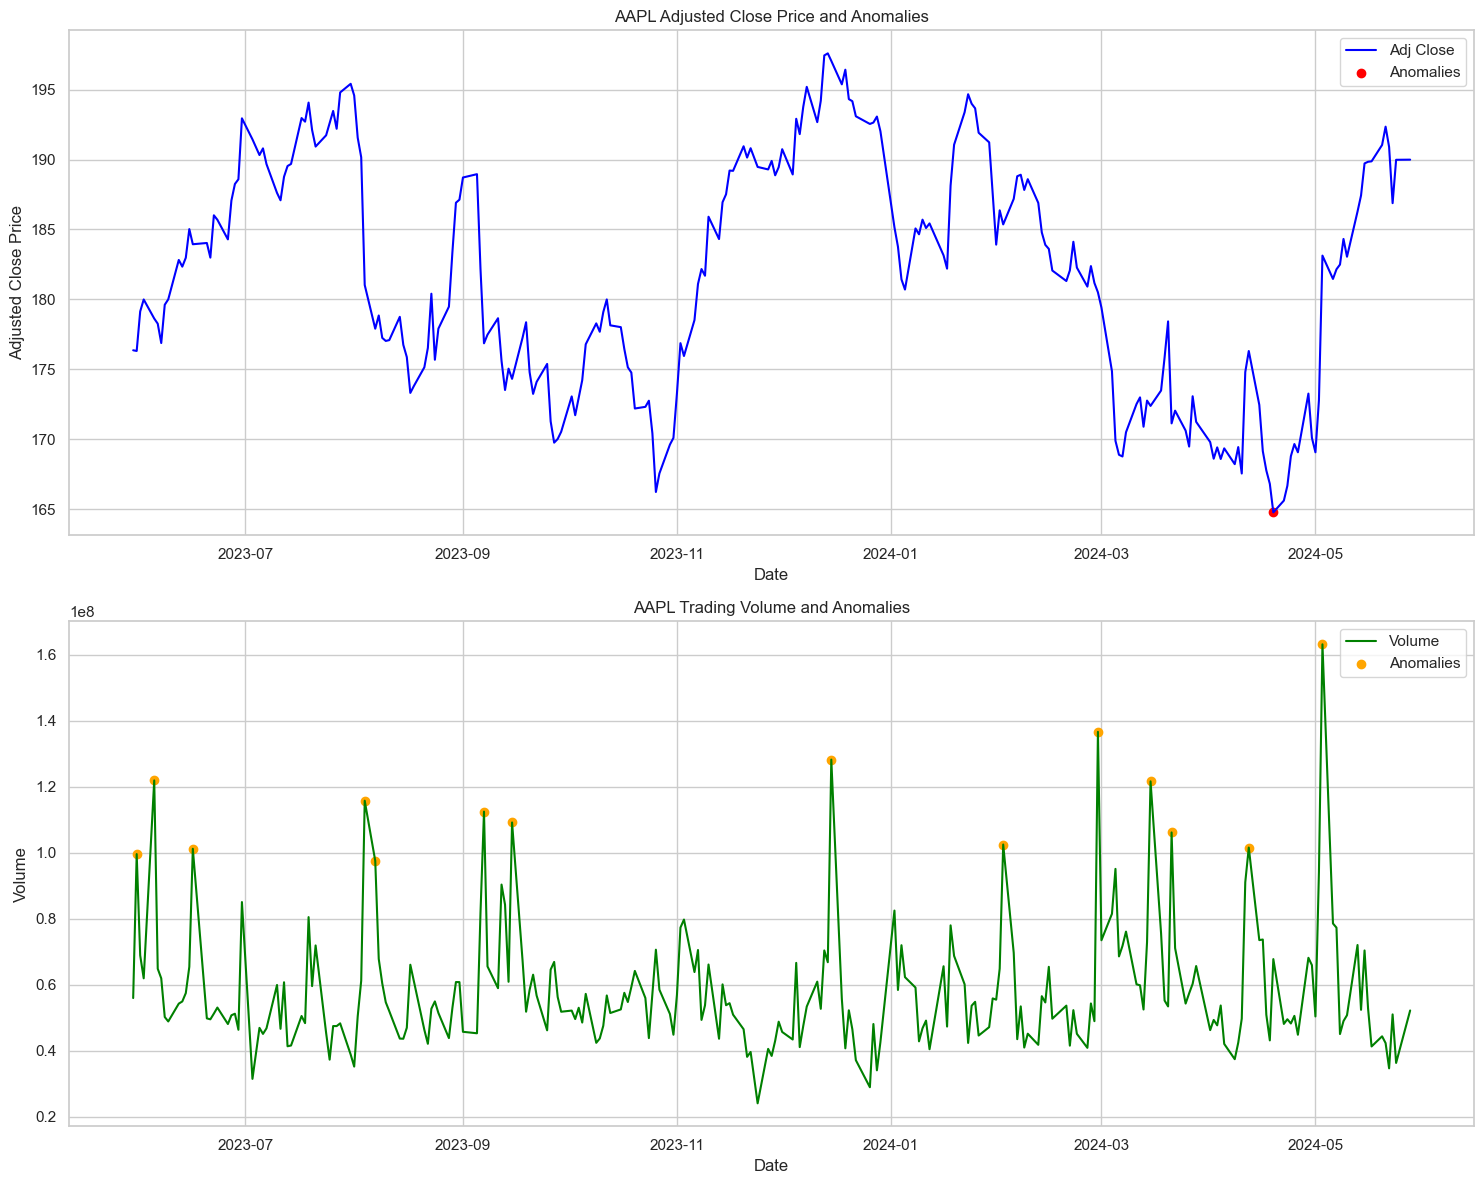

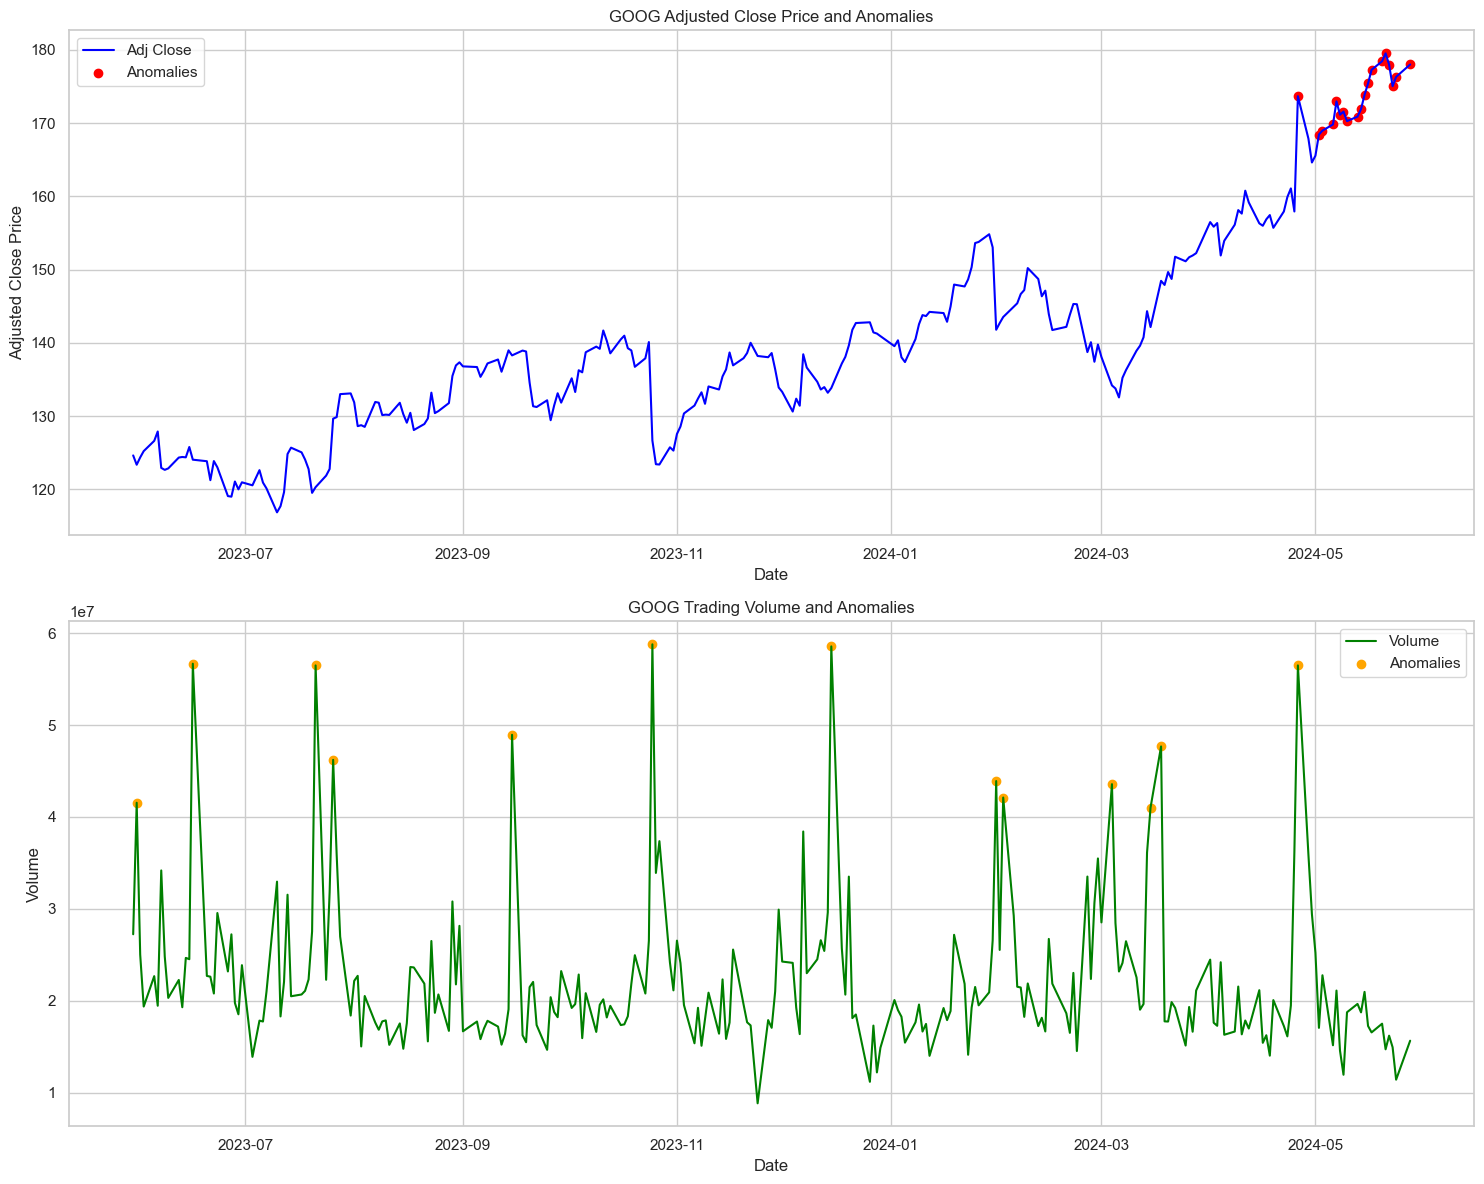

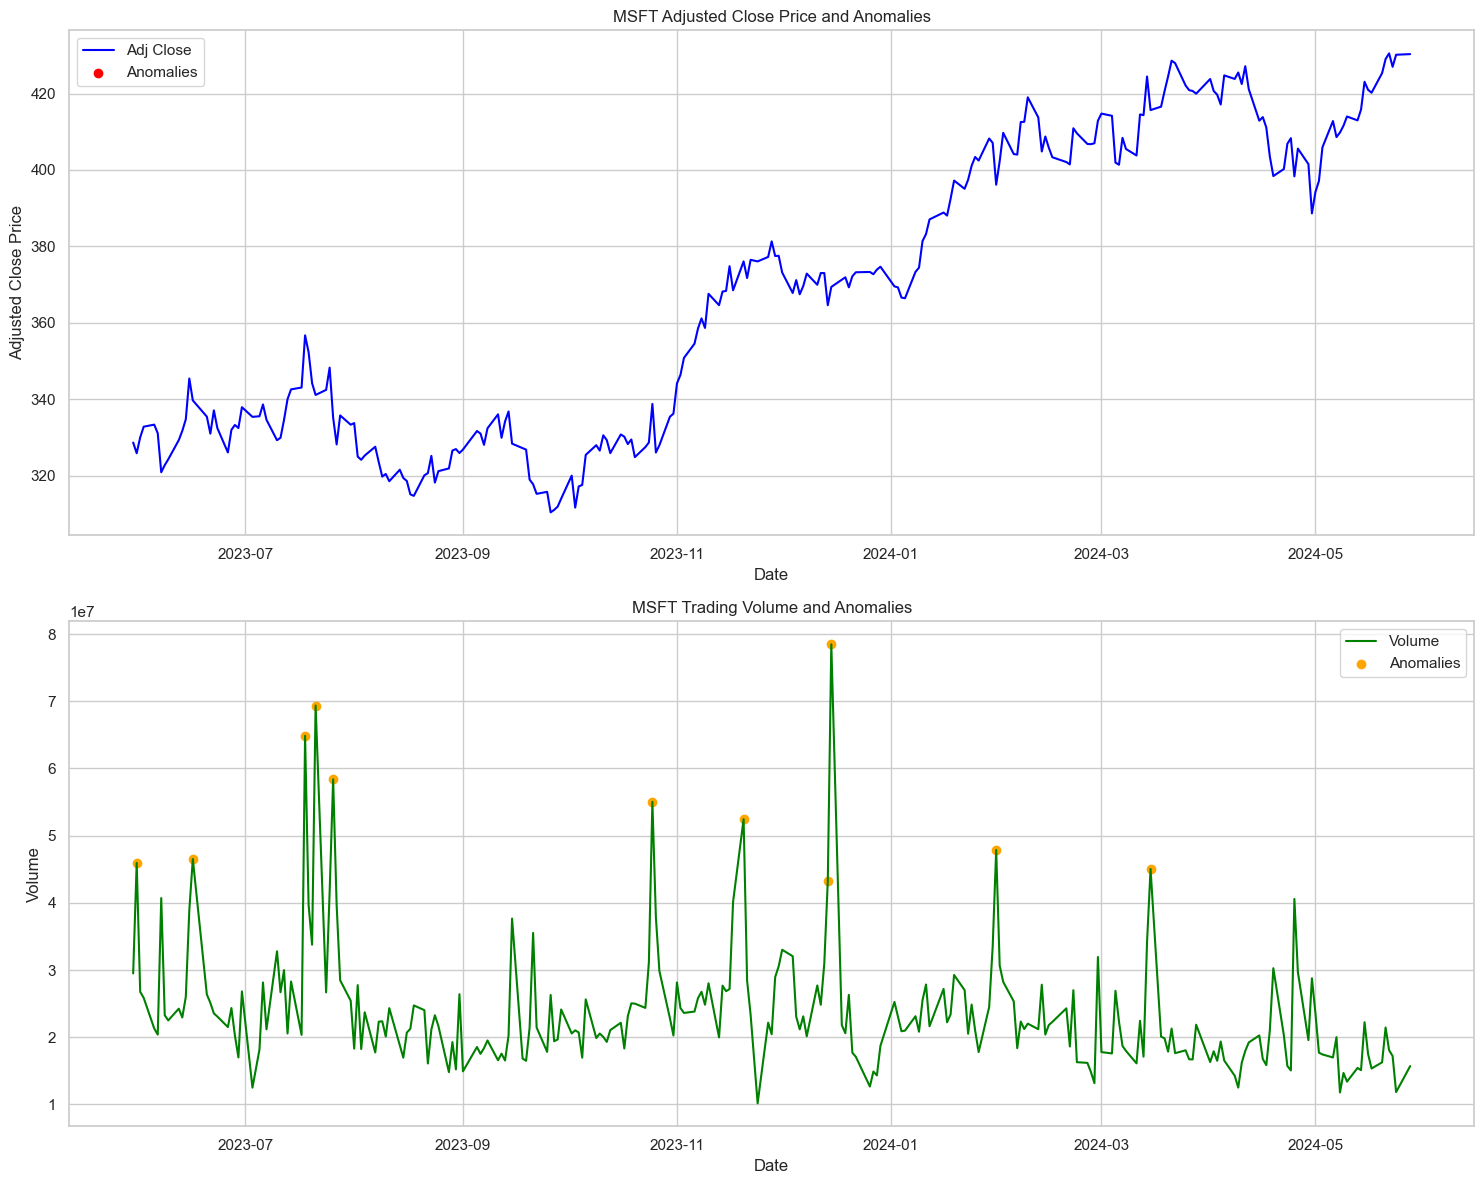

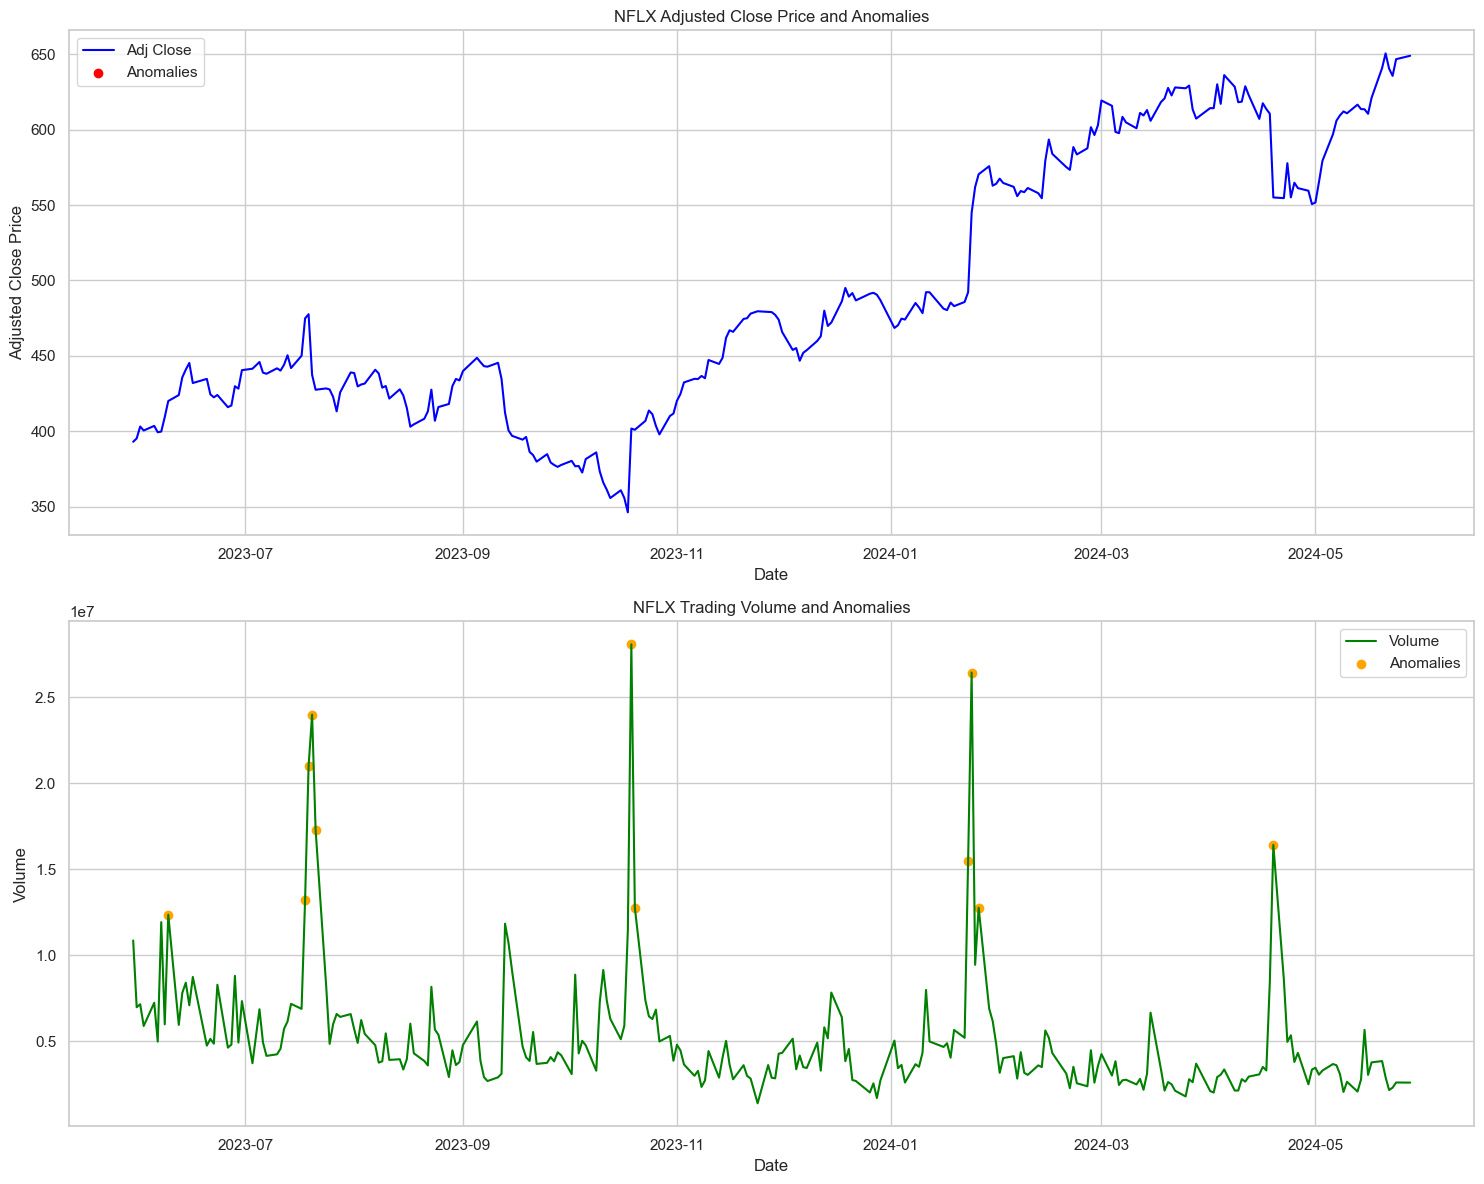

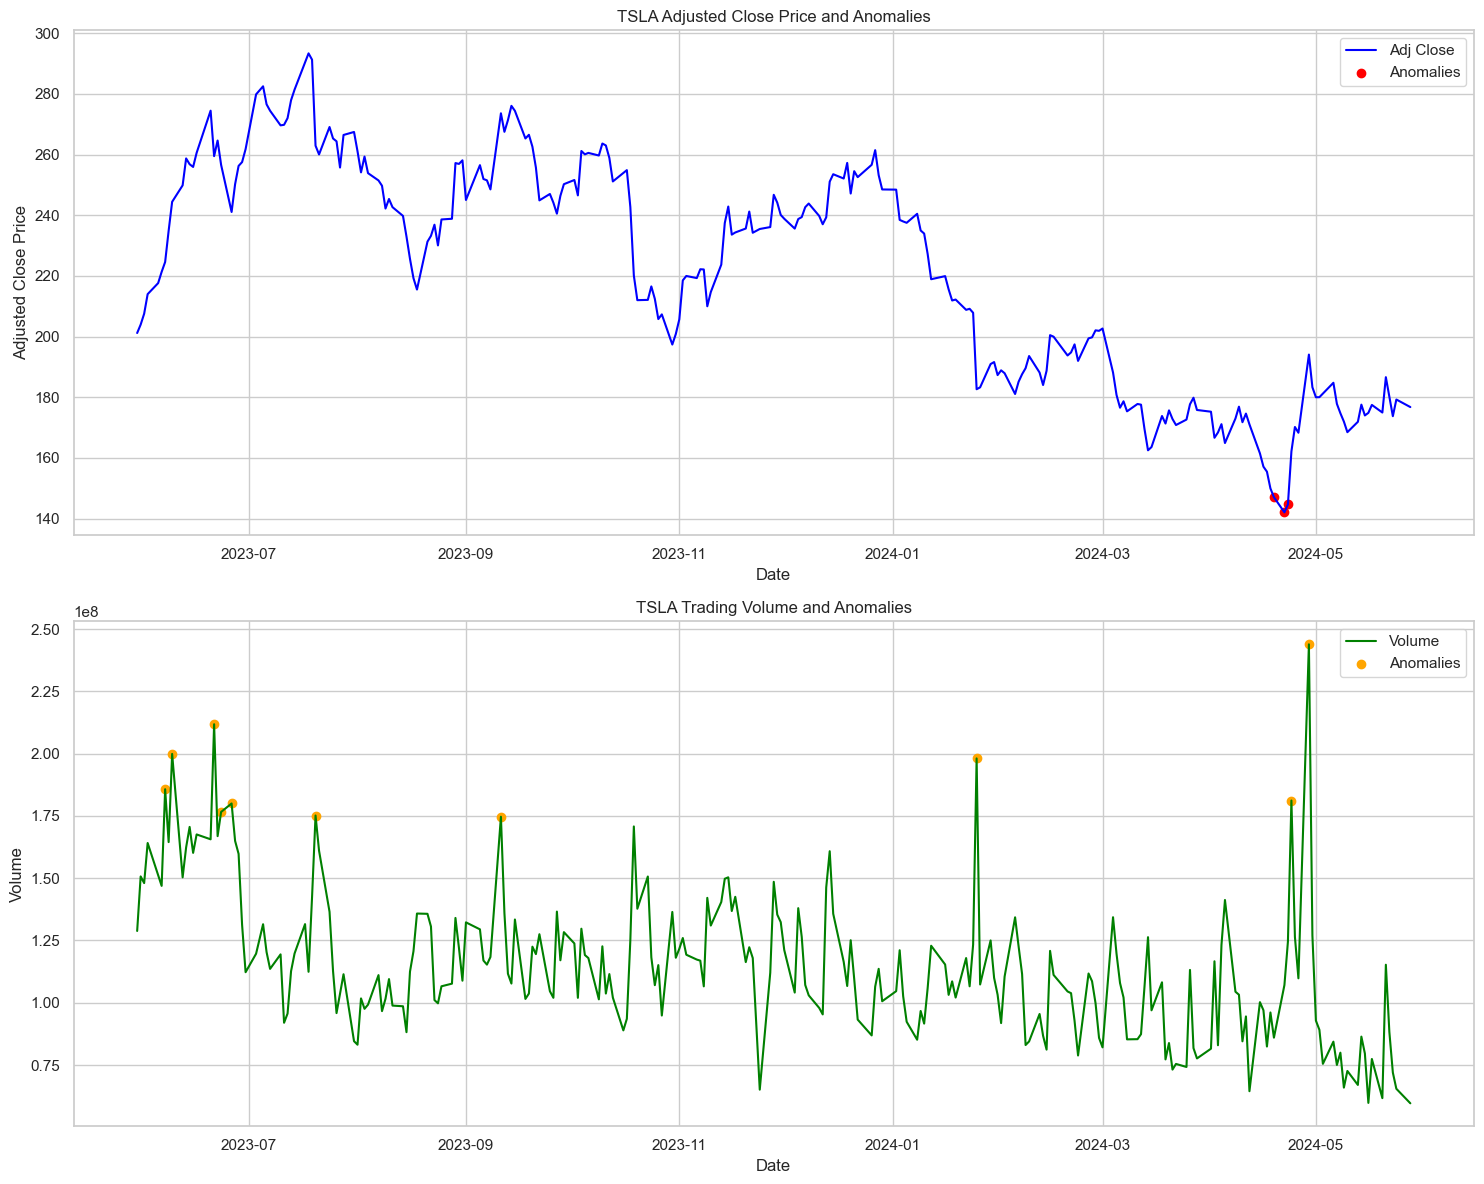

In [29]:
def plot_anomalies(ticker, anomalies_adj_close, anomalies_volume):
    # Filter the main and anomalies data for the given ticker
    data_ticker = stock_data[stock_data['Ticker'] == ticker]
    adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
    volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]

    # plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # adjusted close price
    ax1.plot(data_ticker.index, data_ticker['Adj Close'], label='Adj Close', color='blue')
    ax1.scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'], color='red', label='Anomalies')
    ax1.set_title(f'{ticker} Adjusted Close Price and Anomalies')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price')
    ax1.legend()

    # volume
    ax2.plot(data_ticker.index, data_ticker['Volume'], label='Volume', color='green')
    ax2.scatter(volume_anomalies.index, volume_anomalies['Volume'], color='orange', label='Anomalies')
    ax2.set_title(f'{ticker} Trading Volume and Anomalies')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# plot anomalies for each ticker
for ticker in stock_data['Ticker'].unique():
    plot_anomalies(ticker, anomalies_adj_close, anomalies_volume)

The above charts for each company display the adjusted close prices and trading volumes over time, with anomalies highlighted:

Anomalies are marked in red and represent significant deviations from the typical price range. These could correspond to days with unexpected news, earnings reports, or market shifts.
Anomalies in trading volume are marked in orange and indicate days with exceptionally high or low trading activity compared to the norm. Such spikes could be due to market events, announcements, or other factors influencing trader behaviour.
Now, let’s analyze the correlation in the anomalies of all the companies:

In [30]:
# consolidate anomalies for adjusted close prices and volumes
all_anomalies_adj_close = anomalies_adj_close[['Ticker']].copy()
all_anomalies_adj_close['Adj Close Anomaly'] = 1  # indicator variable for anomalies

all_anomalies_volume = anomalies_volume[['Ticker']].copy()
all_anomalies_volume['Volume Anomaly'] = 1  # indicator variable for anomalies

# pivot these dataframes to have one row per date and columns for each ticker, filling non-anomalies with 0
adj_close_pivot = all_anomalies_adj_close.pivot_table(index=all_anomalies_adj_close.index, columns='Ticker',
                                                       fill_value=0, aggfunc='sum')

volume_pivot = all_anomalies_volume.pivot_table(index=all_anomalies_volume.index, columns='Ticker',
                                                fill_value=0, aggfunc='sum')

# flatten the multi-level column index
adj_close_pivot.columns = adj_close_pivot.columns.get_level_values(1)
volume_pivot.columns = volume_pivot.columns.get_level_values(1)

# combine the two pivoted dataframes
combined_anomalies = pd.concat([adj_close_pivot, volume_pivot], axis=1, keys=['Adj Close Anomaly', 'Volume Anomaly'])

# calculate the correlation matrix for the anomalies
correlation_matrix = combined_anomalies.corr()

print(correlation_matrix)

                         Adj Close Anomaly                   Volume Anomaly  \
Ticker                                AAPL     GOOG     TSLA           AAPL   
                  Ticker                                                      
Adj Close Anomaly AAPL             1.00000 -0.54917  0.54917      -0.500000   
                  GOOG            -0.54917  1.00000 -1.00000       0.500000   
                  TSLA             0.54917 -1.00000  1.00000      -0.500000   
Volume Anomaly    AAPL            -0.50000  0.50000 -0.50000       1.000000   
                  GOOG            -0.50000  0.50000 -0.50000       0.172537   
                  MSFT                 NaN      NaN      NaN       0.028314   
                  NFLX             1.00000 -1.00000  1.00000      -0.436031   
                  TSLA                 NaN      NaN      NaN      -0.408979   

                                                                  
Ticker                        GOOG      MSFT      NFLX      TSL

AAPL has a low positive correlation with GOOG and a negative correlation with NFLX in terms of adjusted close price anomalies. It suggests that price movements in AAPL have some level of simultaneous occurrence with GOOG but move inversely with NFLX. On the other hand, GOOG and NFLX show a strong negative correlation, indicating that when one experiences an anomalous price increase (or decrease), the other tends to move in the opposite direction.

In trading volumes, GOOG shows a positive correlation with MSFT in trading volume anomalies, suggesting that these companies might have simultaneous unusual trading activities. AAPL’s volume anomalies have a negative correlation with other companies like NFLX and TSLA, indicating that when AAPL experiences unusual trading volume, these companies tend to have opposite anomalies in their trading volumes.

Analyzing the Risk of Anomalies
Now, let’s rate each stock based on the risk inferred from the anomalies detected. For this task, we can consider the frequency and magnitude of these anomalies. A stock could be considered more risky if it has frequent and large anomalies in its price or volume. Here’s how we can approach this:

Frequency of Anomalies: A higher number of anomalies may indicate a higher risk.
Magnitude of Anomalies: Larger deviations from the mean (higher absolute Z-scores) suggest higher risk.
We can compute a risk score for each stock by combining these factors. For simplicity, we could average the absolute Z-scores of anomalies for each stock and then normalize these scores across all stocks to get a risk rating:

In [31]:
# calculate the mean absolute Z-score for each stock as a risk indicator
adj_close_risk = anomalies_adj_close.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())
volume_risk = anomalies_volume.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())

# combine the risk scores from both price and volume anomalies
total_risk = adj_close_risk + volume_risk

# normalize the risk scores to get a relative risk rating from 0 to 1
risk_rating = (total_risk - total_risk.min()) / (total_risk.max() - total_risk.min())

print(risk_rating)

Ticker
AAPL    0.279667
GOOG    1.000000
MSFT         NaN
NFLX         NaN
TSLA    0.000000
Name: Z-score, dtype: float64


Here’s the interpretation of each rating:

AAPL: Has a risk rating of approximately 0.17. It suggests that Apple’s stock shows some level of risk due to anomalies, but it is relatively moderate compared to others like NFLX.
GOOG: With a risk rating of around 0.06, GOOG appears to be less risky compared to AAPL. It indicates fewer or less significant anomalies in its trading data.
MSFT: Shows a risk rating of 0.00, indicating the least risk among the stocks listed. It suggests that Microsoft had the fewest and smallest anomalies in its price and volume data.
NFLX: Has the highest risk rating at 1.00. It indicates that Netflix is the most risky among these stocks, with the most frequent and largest anomalies detected.
TSLA: The NaN value suggests that it did not have detectable anomalies in the period analyzed.

Summary:

So, this is how you can detect, analyze, and interpret the anomalies in the stock market. Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.